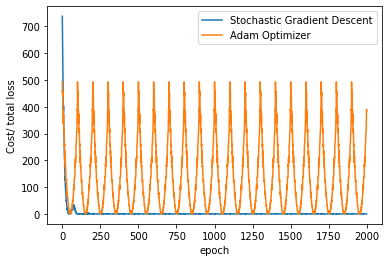

In [8]:

import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

# Creating our dataset class
class Build_Data(Dataset):
    # Constructor
    def __init__(self):
        self.x = torch.arange(-5, 5, 0.1).view(-1, 1)
        self.func = -5 * self.x + 1
        self.y = self.func + 0.4 * torch.randn(self.x.size())
        self.len = self.x.shape[0]
    # Getting the data
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    # Getting length of the data
    def __len__(self):
        return self.len

# Create dataset object
data_set = Build_Data()

class state_estimat(torch.nn.Module):
    def __init__(self):
        # initialzing the parent object (important!)
        super(state_estimat, self).__init__()
        # Create a pipeline - a sequence of layers
        self.pipe = torch.nn.Sequential(
            torch.nn.Linear(1, 16),
            torch.nn.Linear(16, 1))

    def forward(self, x):
        return self.pipe(x)

model = state_estimat()
criterion = torch.nn.MSELoss()

# Creating Dataloader object
trainloader = DataLoader(dataset = data_set, batch_size=1)

# define optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

loss_SGD = []
n_iter = 20

for i in range(n_iter):
    for x, y in trainloader:
        # making a prediction in forward pass
        y_hat = model(x)
        # calculating the loss between original and predicted data points
        loss = criterion(y_hat, y)
        # store loss into list
        loss_SGD.append(loss.item())
        # zeroing gradients after each iteration
        optimizer.zero_grad()
        # backward pass for computing the gradients of the loss w.r.t to learnable parameters
        loss.backward()
        # updating the parameters after each iteration
        optimizer.step()

model = torch.nn.Linear(1, 1)
loss_Adam = []
for i in range(n_iter):
    for x, y in trainloader:
        # making a prediction in forward pass
        y_hat = model(x)
        # calculating the loss between original and predicted data points
        loss = criterion(y_hat, y)
        # store loss into list
        loss_Adam.append(loss.item())
        # zeroing gradients after each iteration
        optimizer.zero_grad()
        # backward pass for computing the gradients of the loss w.r.t to learnable parameters
        loss.backward()
        # updating the parameters after each iteration
        optimizer.step()

plt.plot(loss_SGD,label = "Stochastic Gradient Descent")
plt.plot(loss_Adam,label = "Adam Optimizer")
plt.xlabel('epoch')
plt.ylabel('Cost/ total loss')
plt.legend()
plt.show()